In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing libraries that are recquired for the EDA of this dataset.

In [ ]:
df = pd.read_csv('1. Weather Data.csv')

Data Overview and Cleaning:

In [ ]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Initial exploration to check for the first 10 rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


Gives information about the rows and columns in the dataset as well as their data types.

In [ ]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


 Analyzes numeric as well as to object series or series of a DataFrame and check for outliers.

In [ ]:
df.isnull().sum()

,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


Used to check for missing values in the dataset and presently we have none.

In [ ]:
df.duplicated().sum()

0

This function is used to check and identify duplicate values and as per the result of  the function we have no duplicate values.

Statistical Summary:

In [ ]:
statistical_summary = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
df[statistical_summary].describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


This provides insight to the measures of central tendency in the numerical fields in the weather dataset which are the mean, count, mode, standard deviation and quartiles.


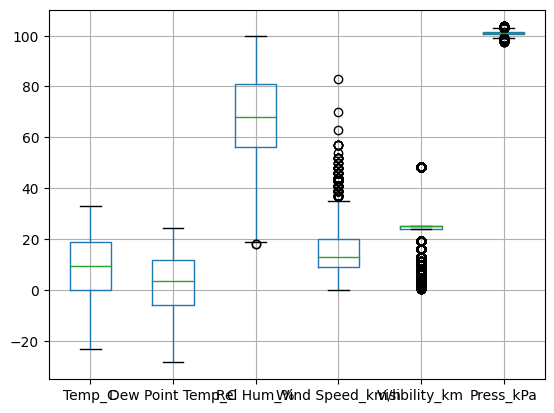

In [ ]:
df.boxplot(column=statistical_summary)
plt.show()


A box plot has been used to graphically represent and check for outliers. No significant outliers have been identified.

Data Visualization

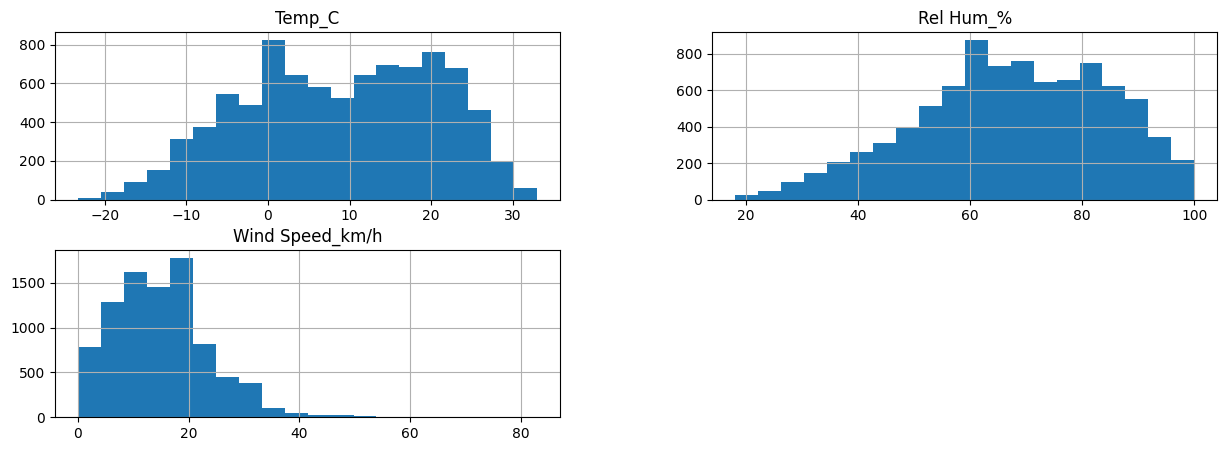

In [ ]:
df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']].hist(bins=20, figsize=(15, 5))
plt.show()


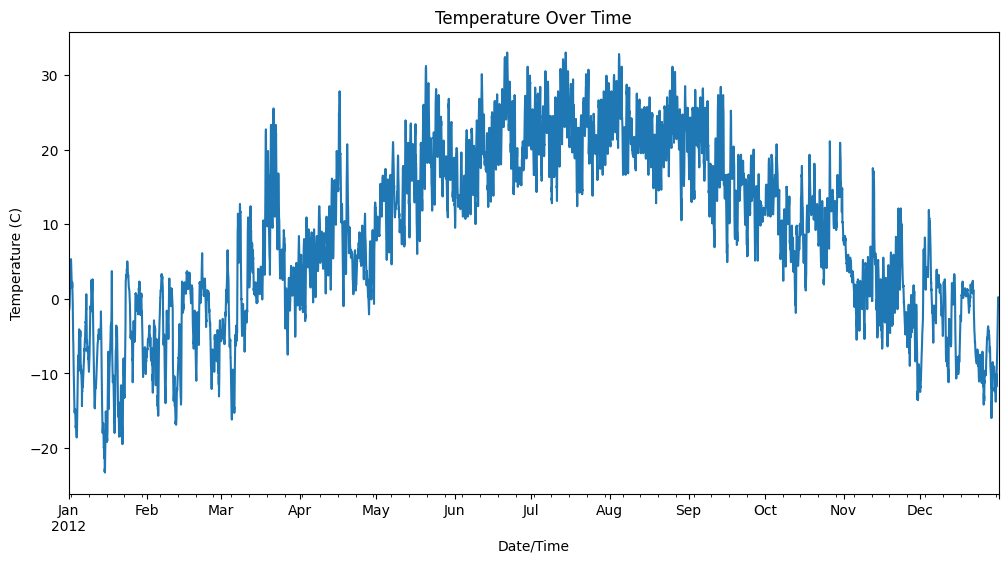

In [ ]:

df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

#time series for temperature
df['Temp_C'].plot(figsize=(12, 6))
plt.title('Temperature Over Time')
plt.ylabel('Temperature (C)')
plt.show()


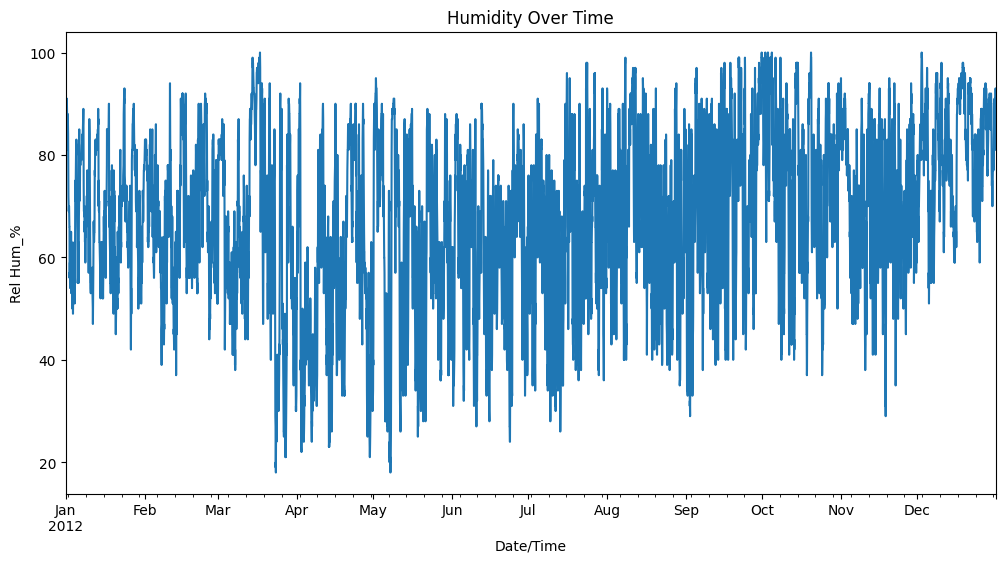

In [ ]:
#time series for humidity
df['Rel Hum_%'].plot(figsize=(12, 6))
plt.title('Humidity Over Time')
plt.ylabel('Rel Hum_%')
plt.show()

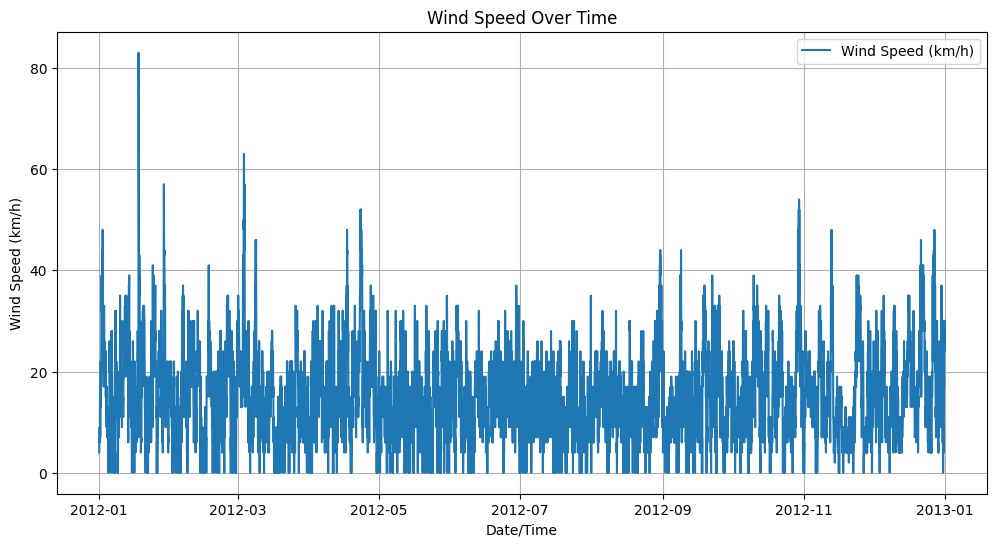

In [ ]:
#time series plot for wind speed
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Wind Speed_km/h'], label='Wind Speed (km/h)')
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)
plt.show()

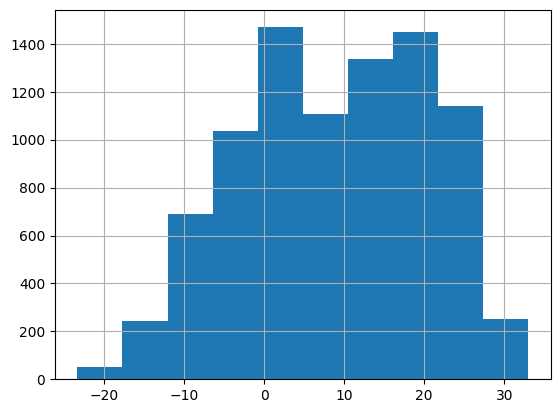

In [ ]:
df['Temp_C'].hist()
plt.show()

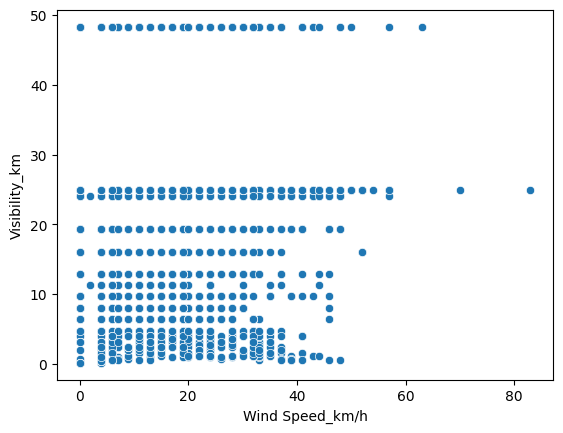

In [ ]:
sns.scatterplot(x='Wind Speed_km/h', y='Visibility_km', data=df)
plt.show()

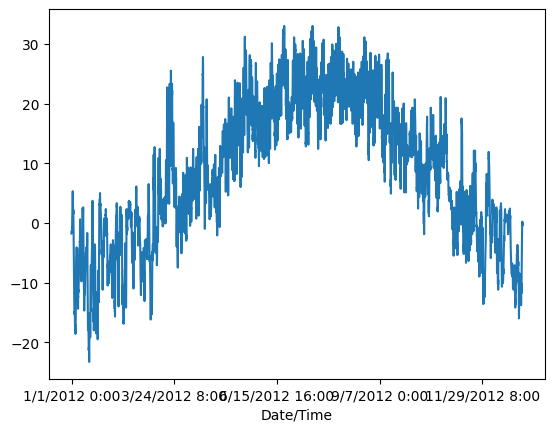

In [ ]:
df.set_index('Date/Time', inplace=True)
df['Temp_C'].plot()
plt.show()

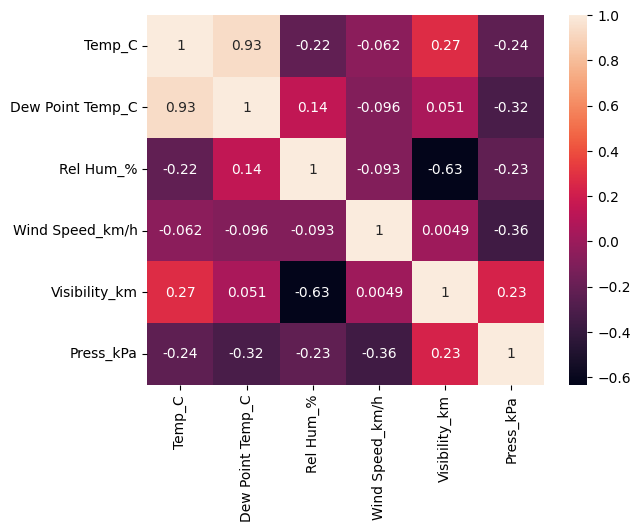

In [ ]:
correlation_matrix = df.drop ('Weather',axis=1).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()